In [15]:
#meta 4/15/2021 myClassify (multiclass) for LSHTC - Data prep
# task: classify text (multiclass) 
# input: my-input/lshtc3_wikipedia_med_df_train.pkl

#task: Multi-category text classification - supervised
#based on 1_classify_sentiment_spacy_multi.ipynb


#history
#      4/15/2021 DATA PREP 
#      LSHTC3 reduced ds with less labels
#      Important reset index - fast.ai dataloaders don't like a gap in index
#      to avoid -> TypeError: 'float' object is not iterable

In [16]:
%matplotlib inline
#import time as time #to track performance time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from joblib import load, dump


# LSHTC: Data Prep for Classifying Text

## 0. Load Data
input: a prepared pickle with less labels (~).

In [17]:
df = load('data/lshtc3_wikipedia_med_df_train.pkl') 
print(df.shape)
print(df.columns)
df.head()


(151800, 3)
Index(['docno', 'labels', 'text'], dtype='object')


,docno,labels,text
3,2,130762,Alain Connes (born 1 April 1947) is a French m...
4,3,352578,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
5,3,395447,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
6,3,27512,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
8,4,390846,"Allan Dwan (April 3, 1885 – December 28, 1981)..."


## 1. Data Prep
Tidy data - pick relevant columns

In [18]:
df_tidy = df[['labels', 'text']].copy()
df_tidy['labels'] = df_tidy['labels'].astype('category')
df_tidy.dtypes


labels    category
text        object
dtype: object

ML Expected Format: input features X(matrix) and target variable y(vector).  
X - column 'text'  
y - column 'labels' 

10088     1075
10307      508
10590      886
13139      587
14661     1012
          ... 
427995     671
428198     589
429649     528
437070     934
443106     724
Name: labels, Length: 139, dtype: int64


<AxesSubplot:>

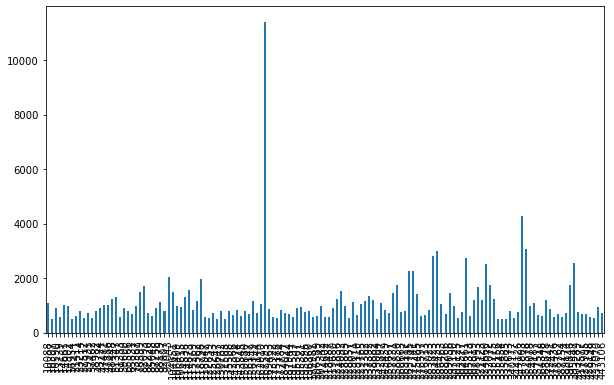

In [19]:
#compare original y counts
print(df_tidy['labels'].value_counts().sort_index())
df_tidy['labels'].value_counts().sort_index().plot(kind='bar')

In [20]:
#preview ready dataset
df_tidy.head()

,labels,text
3,130762,Alain Connes (born 1 April 1947) is a French m...
4,352578,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
5,395447,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
6,27512,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
8,390846,"Allan Dwan (April 3, 1885 – December 28, 1981)..."


In [21]:
#reset index - fast.ai dataloaders don't like a gap in index
#to avoid -> TypeError: 'float' object is not iterable
df_tidy.reset_index(drop=True, inplace=True)
df_tidy.head(2)

,labels,text
0,130762,Alain Connes (born 1 April 1947) is a French m...
1,352578,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...


In [22]:
#save file prepped for sentiment analysis
dump(df_tidy, 'data/lshtc3_wikipedia_med_df_train_tidy.pkl')

['data/lshtc3_wikipedia_med_df_train_tidy.pkl']

In [23]:
mystop

NameError: name 'mystop' is not defined

##### Xtra

In [ ]:
#clean df
df_tidy.rename_axis(index = None, inplace=True)
df_tidy.head(2)